In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 92 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6750570 sha256=887362a99553b189b7268f087534e6782817c5dedb8daecbd435592186e00efe
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the p

In [2]:
import fbprophet

In [3]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
os.getcwd()

'/content'

In [6]:
df = pd.read_excel("gdrive/MyDrive/ips3.xlsx")
df.tail(10)

,Дата,ИПЦ
240,2022-01-01,108.14
241,2022-02-01,108.56
242,2022-03-01,114.97
243,2022-04-01,115.05
244,2022-05-01,113.81
245,2022-06-01,112.68
246,2022-07-01,112.37
247,2022-08-01,111.75
248,2022-09-01,111.08
249,2022-10-01,110.58


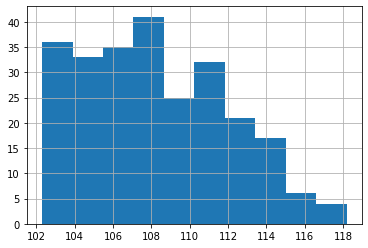

In [7]:
df['ИПЦ'].hist()

In [8]:
df1 = df.rename({'Дата':'ds','ИПЦ':'y'}, axis = 1)

In [9]:
adfuller(df1.y)

(-2.2153661707487378,
 0.2007157672760025,
 13,
 236,
 {'1%': -3.4583663275730476,
  '5%': -2.8738660999177132,
  '10%': -2.5733390785693766},
 496.9726143774616)

In [10]:
df1['ds']

0     2002-01-01
1     2002-02-01
2     2002-03-01
3     2002-04-01
4     2002-05-01
         ...    
245   2022-06-01
246   2022-07-01
247   2022-08-01
248   2022-09-01
249   2022-10-01
Name: ds, Length: 250, dtype: datetime64[ns]

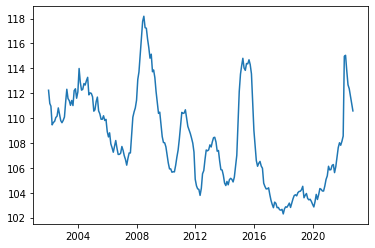

In [13]:
from matplotlib import figure


plt.plot(df1['ds'], df1['y'])

In [14]:
model = fbprophet.Prophet(yearly_seasonality = False,  daily_seasonality = True, weekly_seasonality = False, seasonality_mode = 'additive')
model.fit(df1)

In [18]:
future = model.make_future_dataframe(periods = 4, freq = 'y')
forecast = model.predict(future);

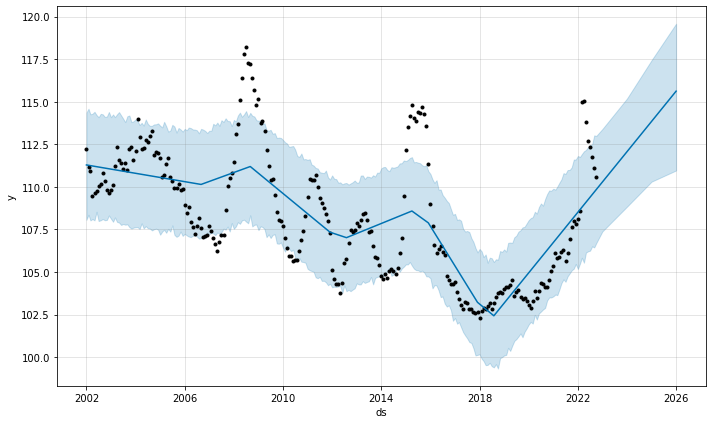

In [19]:
model.plot(forecast);


In [21]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
249,2022-10-01,109.840336,106.694931,112.991517,110.362472,110.362472,110.362472
250,2022-12-31,110.283559,107.380780,113.397569,110.805696,110.792621,110.822073
251,2023-12-31,112.061324,108.831017,115.185623,112.583460,111.886073,113.162664
252,2024-12-31,113.843960,110.305648,117.440287,114.366096,112.615441,115.826434
253,2025-12-31,115.621724,110.963392,119.586932,116.143861,113.112522,118.781271


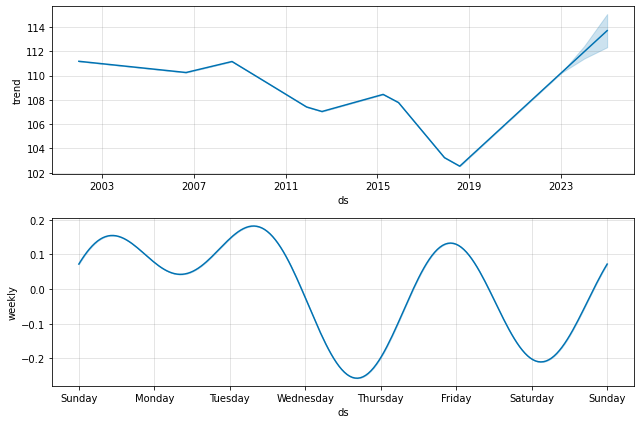

In [ ]:
fig2 = model.plot_components(forecast)